# ib_insync

Built on top of the native Python API from Interactive Brokers

Do check out the documentation for all the benefits of using the library

# Preamble

1. You will need to have TWS station running or IB Gateway running
2. Python version 3.6 or higher
3. Interactive Brokers Python API version 9.73 or higher
4. Ensure your API port is enabled. I use port 4002. Default is 9497.


In [1]:
!pip3 install -U ib_insync

Requirement already up-to-date: ib_insync in /Users/anthonyn/anaconda3/lib/python3.6/site-packages
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Github:
https://github.com/erdewit/ib_insync

# Documentation:
https://rawgit.com/erdewit/ib_insync/master/docs/html/readme.html

***

# Connection

In [2]:
from ib_insync import *

In [4]:
ib = IB()
ib.connect('127.0.0.1', 4002, clientId=32)

ERROR:ib_insync.wrapper:Error 321, reqId 1: Error validating request:-'aS' : cause - ALL account is not supported


<IB connected to 127.0.0.1:4002 clientId=32>

***

# Download Historical Data

http://interactivebrokers.github.io/tws-api/historical_bars.html

## Forex

In [5]:
contract = Forex('AUDUSD')
bars = ib.reqHistoricalData(contract, 
                            endDateTime='', 
                            durationStr='10 D',
                            barSizeSetting='1 day', 
                            whatToShow='MIDPOINT', 
                            useRTH=True)

In [6]:
bars

[BarData(date=datetime.date(2018, 4, 3), open=0.76595, high=0.770695, low=0.765225, close=0.76843, volume=-1, barCount=-1, average=-1.0),
 BarData(date=datetime.date(2018, 4, 4), open=0.76855, high=0.77216, low=0.76628, close=0.77165, volume=-1, barCount=-1, average=-1.0),
 BarData(date=datetime.date(2018, 4, 5), open=0.7716, high=0.77265, low=0.767405, close=0.7684, volume=-1, barCount=-1, average=-1.0),
 BarData(date=datetime.date(2018, 4, 6), open=0.768325, high=0.769965, low=0.765775, close=0.76731, volume=-1, barCount=-1, average=-1.0),
 BarData(date=datetime.date(2018, 4, 9), open=0.76785, high=0.771115, low=0.765215, close=0.769735, volume=-1, barCount=-1, average=-1.0),
 BarData(date=datetime.date(2018, 4, 10), open=0.76975, high=0.776815, low=0.769375, close=0.776185, volume=-1, barCount=-1, average=-1.0),
 BarData(date=datetime.date(2018, 4, 11), open=0.775975, high=0.7773, low=0.77397, close=0.775255, volume=-1, barCount=-1, average=-1.0),
 BarData(date=datetime.date(2018, 4

We make use of the `util` library that comes with ib_insync to render the diplay in a more human readable format.
https://rawgit.com/erdewit/ib_insync/master/docs/html/api.html#module-ib_insync.util 

In [7]:
df = util.df(bars)
print(df[['date', 'open', 'high', 'low', 'close']])

         date      open      high       low     close
0  2018-04-03  0.765950  0.770695  0.765225  0.768430
1  2018-04-04  0.768550  0.772160  0.766280  0.771650
2  2018-04-05  0.771600  0.772650  0.767405  0.768400
3  2018-04-06  0.768325  0.769965  0.765775  0.767310
4  2018-04-09  0.767850  0.771115  0.765215  0.769735
5  2018-04-10  0.769750  0.776815  0.769375  0.776185
6  2018-04-11  0.775975  0.777300  0.773970  0.775255
7  2018-04-12  0.775875  0.777160  0.773815  0.775500
8  2018-04-13  0.775650  0.780990  0.775270  0.776280
9  2018-04-16  0.776500  0.778325  0.775220  0.777000


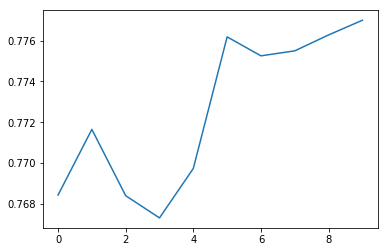

In [8]:
%matplotlib inline
df.close.plot()

In [9]:
contract = Future('ES', '20181221', 'GLOBEX')
bars = ib.reqHistoricalData(contract, 
                            endDateTime='', 
                            durationStr='10 D',
                            barSizeSetting='1 day', 
                            whatToShow='MIDPOINT', 
                            useRTH=True)

In [10]:
bars

[BarData(date=datetime.date(2018, 4, 3), open=2603.875, high=2626.5, low=2581.875, close=2622.125, volume=-1, barCount=-1, average=-1.0),
 BarData(date=datetime.date(2018, 4, 4), open=2580.5, high=2657.25, low=2579.875, close=2653.375, volume=-1, barCount=-1, average=-1.0),
 BarData(date=datetime.date(2018, 4, 5), open=2669.25, high=2680.5, low=2651.875, close=2665.0, volume=-1, barCount=-1, average=-1.0),
 BarData(date=datetime.date(2018, 4, 6), open=2648.75, high=2664.75, low=2593.125, close=2611.0, volume=-1, barCount=-1, average=-1.0),
 BarData(date=datetime.date(2018, 4, 9), open=2627.75, high=2662.25, low=2619.125, close=2629.375, volume=-1, barCount=-1, average=-1.0),
 BarData(date=datetime.date(2018, 4, 10), open=2657.125, high=2673.125, low=2644.0, close=2662.375, volume=-1, barCount=-1, average=-1.0),
 BarData(date=datetime.date(2018, 4, 11), open=2647.375, high=2669.125, low=2645.5, close=2645.5, volume=-1, barCount=-1, average=-1.0),
 BarData(date=datetime.date(2018, 4, 12)

***

# Account and Portfolio
# Account Values

To extract main account details only

http://interactivebrokers.github.io/tws-api/account_updates.html

This is the `updateAccountValue` in the documentation http://interactivebrokers.github.io/tws-api/interfaceIBApi_1_1EWrapper.html#ae15a34084d9f26f279abd0bdeab1b9b5

In [11]:
util.df(ib.accountValues())

,account,tag,value,currency,modelCode
0,DI246990,AccountCode,DI246990,,
1,DI246990,AccountOrGroup,DI246990,BASE,
2,DI246990,AccountOrGroup,DI246990,EUR,
3,DI246990,AccountOrGroup,DI246990,JPY,
4,DI246990,AccountOrGroup,DI246990,USD,
5,DI246990,AccountReady,true,,
6,DI246990,AccountType,INDIVIDUAL,,
7,DI246990,AccruedCash,184,BASE,
8,DI246990,AccruedCash,0,EUR,
9,DI246990,AccruedCash,0,JPY,


In [12]:
[v for v in ib.accountValues() if v.tag=="NetLiquidation"]

[AccountValue(account='DI246990', tag='NetLiquidation', value='1194091.10', currency='USD', modelCode='')]

# Portfolio

http://interactivebrokers.github.io/tws-api/account_updates.html

In [13]:
ib.portfolio()[0]

PortfolioItem(contract=Contract(secType='STK', conId=265598, symbol='AAPL', right='0', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS'), position=200.0, marketPrice=175.3860016, marketValue=35077.2, averageCost=174.95, unrealizedPNL=87.2, realizedPNL=0.0, account='DI246990')

In [14]:
util.df(ib.portfolio())

,contract,position,marketPrice,marketValue,averageCost,unrealizedPNL,realizedPNL,account
0,"Contract(secType='STK', conId=265598, symbol='...",200.0,175.386002,35077.20,174.950000,87.20,0.0,DI246990
1,"Contract(secType='OPT', conId=197397509, symbo...",2.0,0.000753,0.17,244.600000,-489.03,0.0,DI246990
2,"Contract(secType='OPT', conId=197397584, symbo...",-2.0,6.363560,-1426.00,432.400000,-561.20,0.0,DI246990
3,"Contract(secType='FUT', conId=269745169, symbo...",2.0,2673.750000,267375.00,132852.050000,1670.90,0.0,DI246990
4,"Contract(secType='FUT', conId=279396694, symbo...",22.0,2678.300049,2946130.05,132968.527273,20822.45,0.0,DI246990
5,"Contract(secType='CASH', conId=12087792, symbo...",150000.0,1.236770,185515.51,1.122282,17173.14,0.0,DI246990
6,"Contract(secType='STK', conId=208813720, symbo...",600.0,1033.466309,620079.79,1005.994583,16483.04,0.0,DI246990
7,"Contract(secType='STK', conId=43645865, symbol...",7.0,71.591064,501.14,38.837800,229.27,0.0,DI246990
8,"Contract(secType='STK', conId=9408, symbol='MC...",-4.0,161.873093,-647.49,121.264725,-162.43,0.0,DI246990
9,"Contract(secType='CASH', conId=15016059, symbo...",300000.0,107.261505,32178451.54,107.258481,907.38,0.0,DI246990


# Account Summary

To extract all accounts including managed accounts 

http://interactivebrokers.github.io/tws-api/account_summary.html

In [15]:
util.df(ib.accountSummary())

,account,tag,value,currency,modelCode
0,DI246990,AccountType,INDIVIDUAL,,
1,DI246990,Cushion,0.78756,,
2,DI246990,DayTradesRemaining,-1,,
3,DI246990,LookAheadNextChange,1523908800,,
4,DI246990,AccruedCash,183.61,USD,
5,DI246990,AvailableFunds,920438.44,USD,
6,DI246990,BuyingPower,3761673.77,USD,
7,DI246990,EquityWithLoanValue,1114171.10,USD,
8,DI246990,ExcessLiquidity,940418.44,USD,
9,DI246990,FullAvailableFunds,820538.44,USD,


***

# Contracts

ib_insync has written a nice wrapper and added functionalities to define contracts easily.

https://rawgit.com/erdewit/ib_insync/master/docs/html/api.html#module-ib_insync.contract

## Stocks

In [16]:
contract = Stock('IBM', 'SMART', 'USD')

In [17]:
ib.reqContractDetails(contract)

[ContractDetails(summary=Contract(secType='STK', conId=8314, symbol='IBM', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='IBM', tradingClass='IBM'), marketName='IBM', minTick=0.01, orderTypes='ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AON,AVGCOST,BASKET,COND,CONDORDER,DARKONLY,DARKPOLL,DAY,DEACT,DEACTDIS,DEACTEOD,DIS,GAT,GTC,GTD,GTT,HID,IBKRATS,ICE,IMB,IOC,LIT,LMT,LOC,MIT,MKT,MOC,MTL,NGCOMB,NODARK,NONALGO,OCA,OPG,OPGREROUT,PEGBENCH,POSTONLY,PREOPGRTH,REL,RPI,RTH,RTHIGNOPG,SCALE,SCALEODD,SCALERST,SNAPMID,SNAPMKT,SNAPREL,SOLICITED,STP,STPLMT,SWEEP,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='SMART,AMEX,NYSE,CBOE,ISE,CHX,ARCA,ISLAND,VWAP,DRCTEDGE,NSX,BEX,BATS,EDGEA,CSFBALGO,JEFFALGO,BYX,IEX,TPLUS1,PSX', priceMagnifier=1, longName='INTL BUSINESS MACHINES CORP', industry='Technology', category='Computers', subcategory='Computer Services', timeZoneId='EST', tradingHours='20180416:0400-2000;20180417:0400-2000', liquidHours='20180416:0930-1600;20180417:0930-1600', 

## Futures

In [18]:
contract = Future('ES', '20181221', 'GLOBEX')
ib.reqContractDetails(contract)

[ContractDetails(summary=Contract(secType='FUT', conId=289128563, symbol='ES', lastTradeDateOrContractMonth='20181221', multiplier='50', exchange='GLOBEX', currency='USD', localSymbol='ESZ8', tradingClass='ES'), marketName='ES', minTick=0.25, orderTypes='ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,COND,CONDORDER,DAY,DEACT,DEACTDIS,DEACTEOD,GAT,GTC,GTD,GTT,HID,ICE,IOC,LIT,LMT,LTH,MIT,MKT,MTL,NGCOMB,NONALGO,OCA,PEGBENCH,SCALE,SCALERST,SNAPMID,SNAPMKT,SNAPREL,SOLICITED,STP,STPLMT,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='GLOBEX', priceMagnifier=1, underConId=11004968, longName='E-mini S&P 500', contractMonth='201812', timeZoneId='America/Belize', tradingHours='20180416:1700-1515,1530-1600;20180417:1700-1515,1530-1600', liquidHours='20180416:0830-1515,1530-1600;20180417:0830-1515,1530-1600', mdSizeMultiplier=1)]

In [19]:
contract = Future(localSymbol='ESZ7', includeExpired=True)
ib.reqContractDetails(contract)

[ContractDetails(summary=Contract(secType='FUT', conId=247950613, symbol='ES', lastTradeDateOrContractMonth='20171215', multiplier='50', exchange='GLOBEX', currency='USD', localSymbol='ESZ7', tradingClass='ES'), marketName='ES', minTick=0.25, orderTypes='LTH', validExchanges='GLOBEX', priceMagnifier=1, underConId=11004968, longName='E-mini S&P 500', contractMonth='201712', mdSizeMultiplier=1)]

## Forex

In [20]:
contract = Forex('USDJPY')
ib.reqContractDetails(contract)

[ContractDetails(summary=Contract(secType='CASH', conId=15016059, symbol='USD', exchange='IDEALPRO', currency='JPY', localSymbol='USD.JPY', tradingClass='USD.JPY'), marketName='USD.JPY', minTick=0.005, orderTypes='ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,CASHQTY,COND,CONDORDER,DAY,DEACT,DEACTDIS,DEACTEOD,GAT,GTC,GTD,GTT,HID,IOC,LIT,LMT,MIT,MKT,NONALGO,OCA,REL,SCALE,SCALERST,SOLICITED,STP,STPLMT,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='IDEALPRO', priceMagnifier=1, longName='United States dollar', timeZoneId='EST', tradingHours='20180416:1715-1700;20180417:1715-1700', liquidHours='20180416:1715-1700;20180417:1715-1700', mdSizeMultiplier=1)]

If you know the conId of the asset, you can directly specify it as well

In [21]:
contract = Contract(conId=15016059)
ib.reqContractDetails(contract)

[ContractDetails(summary=Contract(secType='CASH', conId=15016059, symbol='USD', exchange='IDEALPRO', currency='JPY', localSymbol='USD.JPY', tradingClass='USD.JPY'), marketName='USD.JPY', minTick=0.005, orderTypes='ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,CASHQTY,COND,CONDORDER,DAY,DEACT,DEACTDIS,DEACTEOD,GAT,GTC,GTD,GTT,HID,IOC,LIT,LMT,MIT,MKT,NONALGO,OCA,REL,SCALE,SCALERST,SOLICITED,STP,STPLMT,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='IDEALPRO', priceMagnifier=1, longName='United States dollar', timeZoneId='EST', tradingHours='20180416:1715-1700;20180417:1715-1700', liquidHours='20180416:1715-1700;20180417:1715-1700', mdSizeMultiplier=1)]

## Options

In [22]:
contract = Option('NFLX', '20190621', 300, 'C', 'SMART')
ib.reqContractDetails(contract)

[ContractDetails(summary=Contract(secType='OPT', conId=292902077, symbol='NFLX', lastTradeDateOrContractMonth='20190621', strike=300.0, right='C', multiplier='100', exchange='SMART', currency='USD', localSymbol='NFLX  190621C00300000', tradingClass='NFLX'), marketName='NFLX', minTick=0.01, orderTypes='ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AON,AVGCOST,BASKET,COND,CONDORDER,DAY,DEACT,DEACTDIS,DEACTEOD,DIS,FOK,GAT,GTC,GTD,GTT,HID,ICE,IOC,LIT,LMT,MIT,MKT,MTL,NGCOMB,NONALGO,OCA,PAON,PEGMIDVOL,PEGMKTVOL,PEGPRMVOL,PEGSRFVOL,POSTONLY,REL,RELSTK,SCALE,SCALERST,SMARTSTG,SNAPMID,SNAPMKT,SNAPREL,SOLICITED,STP,STPLMT,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,VOLAT,WHATIF', validExchanges='SMART,AMEX,CBOE,PHLX,PSE,ISE,BOX,BATS,NASDAQOM,CBOE2,NASDAQBX,MIAX,GEMINI,EDGX,MERCURY,PEARL', priceMagnifier=1, underConId=15124833, longName='NETFLIX INC', contractMonth='201906', industry='Communications', category='Internet', subcategory='Internet Content-Entmnt', timeZoneId='EST', tradingHours='20180416:0930-1600;20180417

In [23]:
contract = Future('ES')
cnt = ib.reqContractDetails(contract)
len(cnt)

19

In [24]:
dat = [res.summary for res in cnt]
util.df(dat)

,secType,conId,symbol,lastTradeDateOrContractMonth,strike,right,multiplier,exchange,primaryExchange,currency,localSymbol,tradingClass,includeExpired,secIdType,secId,comboLegsDescrip,comboLegs,underComp
0,FUT,269745169,ES,20180615,0.0,,50,GLOBEX,,USD,ESM8,ES,False,,,,None,None
1,FUT,279396694,ES,20180921,0.0,,50,GLOBEX,,USD,ESU8,ES,False,,,,None,None
2,FUT,289128563,ES,20181221,0.0,,50,GLOBEX,,USD,ESZ8,ES,False,,,,None,None
3,FUT,293147218,ES,20180615,0.0,,100,ONE,,USD,ES1DM8,ES1D,False,,,,None,None
4,FUT,299552802,ES,20190315,0.0,,50,GLOBEX,,USD,ESH9,ES,False,,,,None,None
5,FUT,303443823,ES,20180921,0.0,,100,ONE,,USD,ES1DU8,ES1D,False,,,,None,None
6,FUT,307369601,ES,20180420,0.0,,100,ONE,,USD,ES1DJ8,ES1D,False,,,,None,None
7,FUT,310629209,ES,20190621,0.0,,50,GLOBEX,,USD,ESM9,ES,False,,,,None,None
8,FUT,310868937,ES,20180518,0.0,,100,ONE,,USD,ES1DK8,ES1D,False,,,,None,None
9,FUT,312047529,ES,20180427,0.0,,100,ONE,,USD,ES1KJ8,ES1K,False,,,,None,None


In [25]:
contract = Stock('IBM')
cnt = ib.reqContractDetails(contract)
len(cnt)

25

In [26]:
dat = [res.summary for res in cnt]
dat[0]

Contract(secType='STK', conId=8314, symbol='IBM', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='IBM', tradingClass='IBM')

In [27]:
util.df(dat)

,secType,conId,symbol,lastTradeDateOrContractMonth,strike,right,multiplier,exchange,primaryExchange,currency,localSymbol,tradingClass,includeExpired,secIdType,secId,comboLegsDescrip,comboLegs,underComp
0,STK,8314,IBM,,0.0,,,SMART,NYSE,USD,IBM,IBM,False,,,,None,None
1,STK,1411277,IBM,,0.0,,,SMART,FWB,EUR,IBM,USSTARS,False,,,,None,None
2,STK,8314,IBM,,0.0,,,AMEX,NYSE,USD,IBM,IBM,False,,,,None,None
3,STK,8314,IBM,,0.0,,,NYSE,NYSE,USD,IBM,IBM,False,,,,None,None
4,STK,8314,IBM,,0.0,,,CBOE,NYSE,USD,IBM,IBM,False,,,,None,None
5,STK,8314,IBM,,0.0,,,ISE,NYSE,USD,IBM,IBM,False,,,,None,None
6,STK,8314,IBM,,0.0,,,CHX,NYSE,USD,IBM,IBM,False,,,,None,None
7,STK,8314,IBM,,0.0,,,ARCA,NYSE,USD,IBM,IBM,False,,,,None,None
8,STK,8314,IBM,,0.0,,,ISLAND,NYSE,USD,IBM,IBM,False,,,,None,None
9,STK,8314,IBM,,0.0,,,DRCTEDGE,NYSE,USD,IBM,IBM,False,,,,None,None


# Orders

http://interactivebrokers.github.io/tws-api/orders.html

http://interactivebrokers.github.io/tws-api/basic_orders.html

In [28]:
util.startLoop()

## Market Order

In [29]:
contract = Forex('USDJPY')
ib.qualifyContracts(contract)

order = MarketOrder('BUY', 100000)

In [30]:
trade = ib.placeOrder(contract, order)

trade

Trade(contract=Forex('USDJPY', conId=15016059, exchange='IDEALPRO', localSymbol='USD.JPY', tradingClass='USD.JPY'), order=MarketOrder(orderId=15, action='BUY', totalQuantity=100000), orderStatus=OrderStatus(status='PendingSubmit'), fills=[], log=[TradeLogEntry(time=datetime.datetime(2018, 4, 16, 15, 31, 49, 233095, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='')])

In [31]:
ib.sleep(1)
trade.log

[TradeLogEntry(time=datetime.datetime(2018, 4, 16, 15, 31, 49, 233095, tzinfo=datetime.timezone.utc), status='PendingSubmit', message=''),
 TradeLogEntry(time=datetime.datetime(2018, 4, 16, 15, 31, 49, 683225, tzinfo=datetime.timezone.utc), status='Submitted', message=''),
 TradeLogEntry(time=datetime.datetime(2018, 4, 16, 15, 31, 49, 999508, tzinfo=datetime.timezone.utc), status='Submitted', message='Fill 100000.0@107.244'),
 TradeLogEntry(time=datetime.datetime(2018, 4, 16, 15, 31, 49, 999508, tzinfo=datetime.timezone.utc), status='Filled', message='')]

## Limit Order

In [32]:
limitOd = LimitOrder('BUY', 100000, 100)
limitTrade = ib.placeOrder(contract, limitOd)

limitTrade

Trade(contract=Forex('USDJPY', conId=15016059, exchange='IDEALPRO', localSymbol='USD.JPY', tradingClass='USD.JPY'), order=LimitOrder(orderId=16, action='BUY', totalQuantity=100000, lmtPrice=100), orderStatus=OrderStatus(status='PendingSubmit'), fills=[], log=[TradeLogEntry(time=datetime.datetime(2018, 4, 16, 15, 31, 50, 634734, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='')])

In [33]:
ib.sleep(1)
assert limitTrade.orderStatus.status == 'Submitted'

In [34]:
assert limitTrade in ib.openTrades()

In [35]:
ib.openOrders()

[LimitOrder(orderId=16, action='BUY', totalQuantity=100000, lmtPrice=100)]

We can modify the limit price

In [36]:
ib.cancelOrder(limitOd)

Trade(contract=Forex('USDJPY', conId=15016059, exchange='IDEALPRO', localSymbol='USD.JPY', tradingClass='USD.JPY'), order=LimitOrder(orderId=16, action='BUY', totalQuantity=100000, lmtPrice=100), orderStatus=OrderStatus(status='Submitted', remaining=100000.0, permId=273977873, clientId=32, mktCapPrice=None), fills=[], log=[TradeLogEntry(time=datetime.datetime(2018, 4, 16, 15, 31, 50, 634734, tzinfo=datetime.timezone.utc), status='PendingSubmit', message=''), TradeLogEntry(time=datetime.datetime(2018, 4, 16, 15, 31, 50, 929823, tzinfo=datetime.timezone.utc), status='Submitted', message=''), TradeLogEntry(time=datetime.datetime(2018, 4, 16, 15, 31, 52, 5170, tzinfo=datetime.timezone.utc), status='PendingCancel', message='')])

In [37]:
limitTrade.log

[TradeLogEntry(time=datetime.datetime(2018, 4, 16, 15, 31, 50, 634734, tzinfo=datetime.timezone.utc), status='PendingSubmit', message=''),
 TradeLogEntry(time=datetime.datetime(2018, 4, 16, 15, 31, 50, 929823, tzinfo=datetime.timezone.utc), status='Submitted', message=''),
 TradeLogEntry(time=datetime.datetime(2018, 4, 16, 15, 31, 52, 5170, tzinfo=datetime.timezone.utc), status='PendingCancel', message='')]

***

# Historical Data
## Bar Data
http://interactivebrokers.github.io/tws-api/historical_bars.html


In [38]:
contract = Stock('IBM', 'SMART', 'USD')
#contract = Forex('AUDUSD')
#ib.reqHeadTimeStamp(contract, whatToShow='TRADES', useRTH=True)

In [39]:
bars = ib.reqHistoricalData(contract,
                            endDateTime='',
                            durationStr = '300 D',
                            barSizeSetting = '1 day',
                            whatToShow = 'TRADES',
                            useRTH = True,
                            formatDate = 1)

In [40]:
bars[0]

BarData(date=datetime.date(2017, 2, 6), open=175.41, high=175.98, low=174.38, close=175.86, volume=19264, barCount=13164, average=175.366)

In [41]:
df = util.df(bars)

df.head()

,date,open,high,low,close,volume,barCount,average
0,2017-02-06,175.41,175.98,174.38,175.86,19264,13164,175.3660
1,2017-02-07,176.09,178.62,175.90,178.46,29734,20880,177.9100
2,2017-02-08,177.50,177.50,175.88,176.17,20839,14303,176.4360
3,2017-02-09,176.17,177.80,175.91,177.21,19361,13072,177.0500
4,2017-02-10,177.37,178.88,176.76,178.68,17086,11208,178.0935


In [42]:
df.tail()

,date,open,high,low,close,volume,barCount,average
295,2018-04-10,155.03,156.61,154.75,155.39,27713,19615,155.599
296,2018-04-11,154.37,155.78,153.88,155.36,23540,17282,154.952
297,2018-04-12,156.75,158.98,156.67,158.07,39479,29229,158.145
298,2018-04-13,158.67,159.22,155.91,156.71,27817,21709,157.196
299,2018-04-16,157.91,159.02,157.76,158.74,5459,2293,158.376


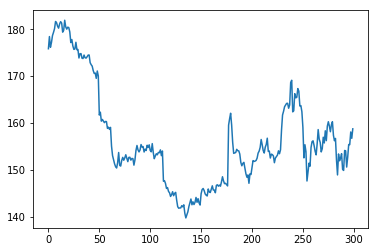

In [43]:
df.close.plot()

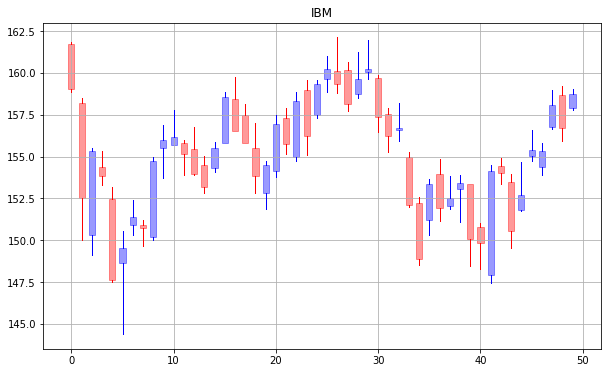

In [44]:
util.barplot(bars[-50:], title=contract.symbol);

# Tick Data

http://interactivebrokers.github.io/tws-api/top_data.html

In [45]:
contract = Forex('AUDUSD')

ib.reqMktData(contract, '', False, False)


Ticker(contract=Forex('AUDUSD', exchange='IDEALPRO'), ticks=[], tickByTicks=[], domBids=[], domAsks=[], domTicks=[])

In [46]:
ticker = ib.ticker(contract)
ib.sleep(2)

ticker

Ticker(contract=Forex('AUDUSD', exchange='IDEALPRO'), time=datetime.datetime(2018, 4, 16, 15, 31, 57, 930494, tzinfo=datetime.timezone.utc), bid=0.7771, bidSize=1500000, ask=0.77712, askSize=2000000, prevBid=0.77711, prevBidSize=2000000, prevAsk=0.77713, prevAskSize=1000000, high=0.77835, low=0.7752, close=0.7764, ticks=[TickData(time=datetime.datetime(2018, 4, 16, 15, 31, 57, 930494, tzinfo=datetime.timezone.utc), tickType=0, price=0.7771, size=1500000)], tickByTicks=[], domBids=[], domAsks=[], domTicks=[])

In [47]:
ticker.marketPrice()

0.77711

In [48]:
ib.cancelMktData(contract)

***